In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

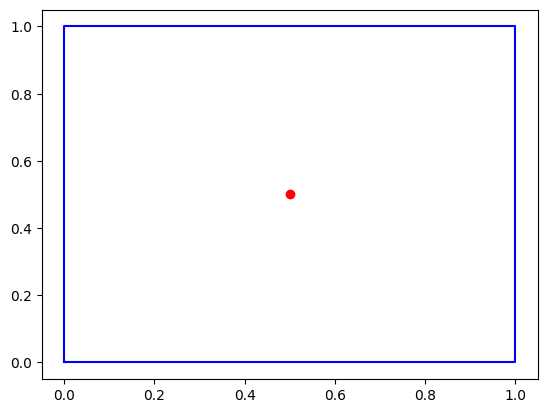

In [1]:
polygon_coords = [(0, 0), 
                  (0, 1), 
                  (1, 1), 
                  (1, 0)]

polygon = Polygon(polygon_coords)

point_x = 0.5
point_y = 0.5

point = Point(point_x, point_y)

fig, ax = plt.subplots()

ax.plot(*polygon.exterior.xy, color='blue')
ax.plot(point.x, point.y, marker='o', color='red')
plt.show()

In [2]:
print(point.covered_by(polygon))

True


In [3]:
import pandas as pd
import json
df = pd.read_json("plu_decoupage.json")

In [4]:
df['coordinates'] = df['geo_shape'].apply(lambda x: x['geometry']['coordinates'])
print(df[['geo_shape', 'coordinates']])

                                             geo_shape  \
0    {'type': 'Feature', 'geometry': {'coordinates'...   
1    {'type': 'Feature', 'geometry': {'coordinates'...   
2    {'type': 'Feature', 'geometry': {'coordinates'...   
3    {'type': 'Feature', 'geometry': {'coordinates'...   
4    {'type': 'Feature', 'geometry': {'coordinates'...   
..                                                 ...   
104  {'type': 'Feature', 'geometry': {'coordinates'...   
105  {'type': 'Feature', 'geometry': {'coordinates'...   
106  {'type': 'Feature', 'geometry': {'coordinates'...   
107  {'type': 'Feature', 'geometry': {'coordinates'...   
108  {'type': 'Feature', 'geometry': {'coordinates'...   

                                           coordinates  
0    [[[7.6384446509075286, 48.540206296469215], [7...  
1    [[[7.784382196232344, 48.5342768902335], [7.81...  
2    [[[7.671534470276169, 48.5251839364802], [7.70...  
3    [[[7.566965592015147, 48.5551220386937], [7.59...  
4    [[[7.59784046

In [5]:
print(df.to_string())

                    commune  num_planche echelle                                                                                                     url_pdf  taille_mo                                                                                                                                                                                                                                                                                                 geo_shape                                            geo_point_2d                                                                                                                                                                                                        coordinates
0                 Holtzheim           50  1/2000  https://sig.strasbourg.eu/datastrasbourg/plu_planches/6.1-PLU_zonage_2000/6.1-PLU_zonage2000_50_062021.pdf       5.60  {'type': 'Feature', 'geometry': {'coordinates': [[[7.6384446509075286, 48.540206296469215], [7.669

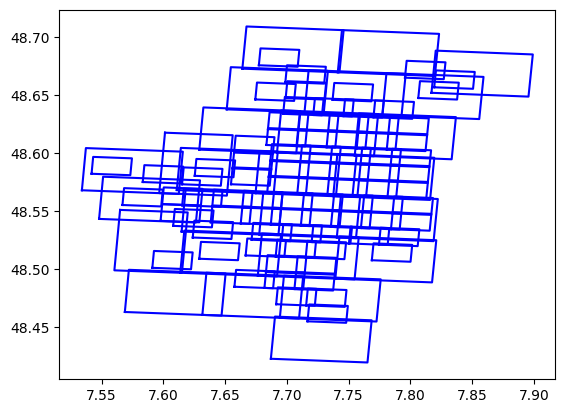

In [6]:
fig, ax = plt.subplots()
for i in df.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    liste_coords.pop()
    polygon = Polygon(liste_coords)
    
    ax.plot(*polygon.exterior.xy, color='blue')
plt.show()

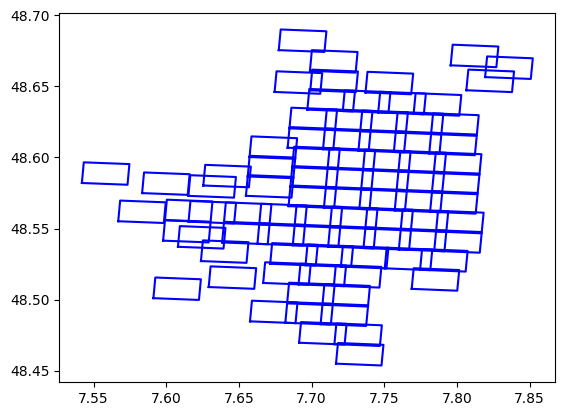

In [7]:
df_2000 = df.loc[df['echelle'] == '1/2000']
fig, ax = plt.subplots()
for i in df_2000.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    polygon = Polygon(liste_coords)
    
    ax.plot(*polygon.exterior.xy, color='blue')
plt.show()

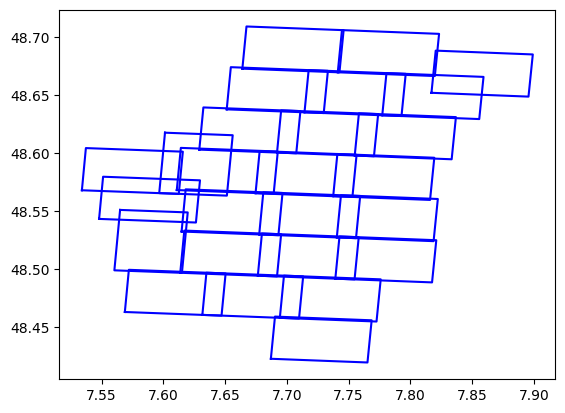

In [8]:
df_5000 = df.loc[df['echelle'] == '1/5000']
fig, ax = plt.subplots()
for i in df_5000.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    polygon = Polygon(liste_coords)
    
    ax.plot(*polygon.exterior.xy, color='blue')
plt.show()

In [9]:
df_2000 = df_2000.drop("commune", axis=1)
df_2000 = df_2000.drop("url_pdf", axis=1)
df_2000 = df_2000.drop("taille_mo", axis=1)
df_2000 = df_2000.drop("geo_shape", axis=1)
df_2000 = df_2000.drop("geo_point_2d", axis=1)

In [10]:
df_5000 = df_5000.drop("commune", axis=1)
df_5000 = df_5000.drop("url_pdf", axis=1)
df_5000 = df_5000.drop("taille_mo", axis=1)
df_5000 = df_5000.drop("geo_shape", axis=1)
df_5000 = df_5000.drop("geo_point_2d", axis=1)

In [11]:
df_2000.to_json("Zone_2000.json")

In [12]:
df_5000.to_json("Zone_5000.json")

In [14]:
df_5000.iloc[12].coordinates

[[[7.610958938599648, 48.56800637154906],
  [7.689404607894328, 48.56486221607613],
  [7.6927426746968735, 48.60121637250204],
  [7.614241434427319, 48.604362723129505]]]

In [61]:
import xml.etree.ElementTree as ET

def extract_coordinates(kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()

    ns = {'kml': 'http://www.opengis.net/kml/2.2', 'gx': 'http://www.google.com/kml/ext/2.2'}

    coordinates_element = root.find('.//gx:LatLonQuad/kml:coordinates', ns)

    if coordinates_element is not None:
        coordinates_text = coordinates_element.text.strip()
        coordinates_list = coordinates_text.split()
        coordinates_list = [coord.strip() for coord in coordinates_list]

        coordinates = []

        for coord in coordinates_list:
            lon_lat = coord.split(',')
            lon_lat_tuple = tuple(map(float, lon_lat))
            coordinates.append(lon_lat_tuple)

        return coordinates
    else:
        raise ValueError("Pas de coordinates dans le fichier kml.")



In [62]:
kml_file = 'result.kml'

coords = extract_coordinates(kml_file)
print(coords)

['7.7184127494993495,48.64602645128585', '7.737414489993581,48.64623633454492', '7.737010122314587,48.6624254824604', '7.71800230017377,48.6622154803805']
[(7.7184127494993495, 48.64602645128585), (7.737414489993581, 48.64623633454492), (7.737010122314587, 48.6624254824604), (7.71800230017377, 48.6622154803805)]


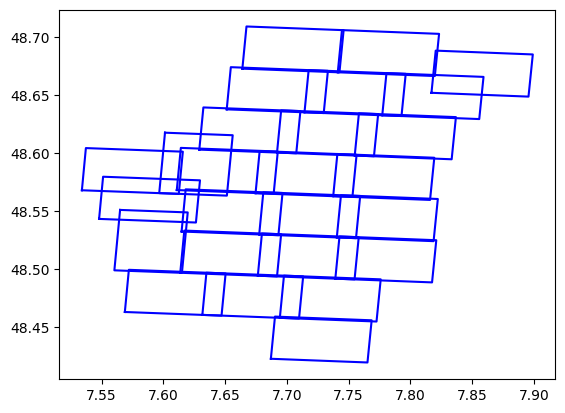

In [74]:
df_5000 = df.loc[df['echelle'] == '1/5000']
fig, ax = plt.subplots()
for i in df_5000.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    polygon = Polygon(liste_coords)
    
    ax.plot(*polygon.exterior.xy, color='blue')
plt.show()

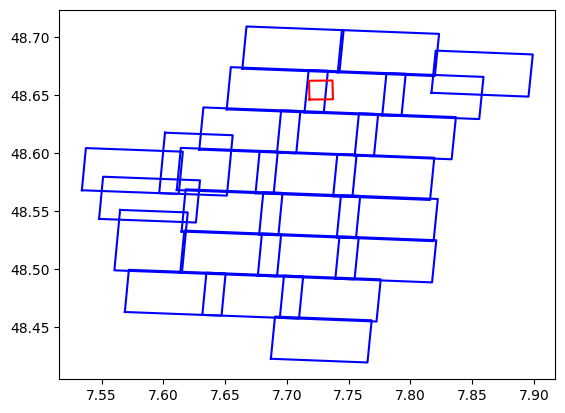

In [73]:
df_5000 = df.loc[df['echelle'] == '1/5000']

fig, ax = plt.subplots()

coord_zone = []

for i in df_5000.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    polygon = Polygon(liste_coords)

    ax.plot(*polygon.exterior.xy, color='blue')
    
polygon = Polygon(coords)

ax.plot(*polygon.exterior.xy, color='red')
plt.show()

In [5]:
def ici(tab_coord_test, coord_zone):
    for i in tab_coord_test:
        print(i)
    return True

In [6]:
coord_test = [[178, 179],[179, 116],[179, 117],[179, 118],[179, 119]]
ici(coord_test)

TypeError: ici() missing 1 required positional argument: 'coord_zone'